# 1 Intro

### Questions to Answer
- Are our recommendations good?
- How to use ML for recommendations?
- How to recommend to new users?

# 2 What's Ahead

### Topics
In this lesson, you will learn about three main topics:
1. We will look from a high level at how you might go about validating your recommendations.
2. We will look at matrix factorization as a method to use machine learning to make recommendations.
3. We will look at combining recommendation techniques to make predictions to existing and new users and for existing and new items.

As we go through this lesson, you will come to realize that there are a lot of difficulties in working with recommendation engines which make them still an exciting field to study! This is especially true when you combine your recommendations with a specific product type.

Recommending movies, recommending restaurants, or recommending clothing might happen in a number of different ways. However, the techniques you will learn in this lesson are often extendable to any of these cases.

# 3 How Do We Know Our Recommendations Are Good?

### Training and Testing Data For Recommendations
In the last lesson, you were making recommendations by providing a list of popular items, or a list of items that the user hadn't observed but that someone with similar tastes had observed. However, understanding if these recommendations are good in practice means that you have to deploy these recommendations to users and see how it impacts your metrics (sales, higher engagement, clicks, conversions, etc.).

You may not want your recommendations to go live to understand how well they work. In these cases, you will want to split your data into training and testing portions. In these cases, you can train your recommendation engine on a subset of the data, then you can test how well your recommendation engine performs on a test set of data before deploying your model to the world.

However, the cases you saw in the last lesson, where just a list of recommendations was provided, don't actually lend themselves very well to training and testing methods of evaluation. In the next upcoming pages, you will be introduced to matrix factorization, which actually does work quite well for these situations.

# 4 Validating Your Recommendations

### Online Testing
For online methods of testing a recommender's performance, many of the methods you saw in the previous lesson work very well - you can deploy your recommendations and just watch your metrics carefully. It is common in practice to set up online recommendations to have an "old" version of recommended items, which is compared to a new page that uses a new recommendation strategy.

All ideas associated with A/B testing that you learned in the earlier lessons are critical to watching your metrics in online learning, and ultimately, choosing a recommendation strategy that works best for your products and customers.

### Offline Testing
In many cases, a company might not let you simply deploy your recommendations out into the real world any time you feel like it. Testing out your recommendations in a training-testing environment prior to deploying them is called **offline** testing.

The recommendation methods you built in the previous lesson actually don't work very well for offline testing. In offline testing, it is ideal to not just obtain a list of recommendations for each individual, because we ultimately don't know if a user doesn't use an item because they don't like it, or because they just haven't used it yet (but would like it). Rather, it would be great if we have an idea of how much each user would like each item using a predicted rating. Then we can compare this predicted rating to the actual rating any individual gives to an item in the future.

In the previous video, you saw an example of a user to whom we gave a list of movies that they still hadn't seen. Therefore, we couldn't tell how well we were doing with our recommendations. Techniques related to matrix factorization lend themselves nicely to solving this problem.

### User Groups
The final (possible) method of validating your recommendations is by having user groups give feedback on items you would recommend for them. Obtaining good user groups that are representative of your customers can be a challenge on its own. This is especially true when you have a lot of products and a very large consumer base.

# 5 Regression Metrics

|Metric|Reg or Class|
|-|-|
|Accuracy|Classification|
|Mean-Squared Error (MSE)|Regression|
|Precision|Classification|
|Recall|Classification|
|R-Squared|Regression|

# 6 Why SVD?

### Singular Value Decomposition
In the next part of this lesson, you will first get exposure to Singular Value Decomposition, or SVD. We will soon see why this technique falls short for many recommendation problems. However, understanding traditional SVD approaches to matrix factorization is useful as a start to a number of matrix factorization techniques that are possible in practice.

In order to implement SVD for many recommendation engines, we will need to use a slightly modified approach known as FunkSVD. This approach proved to work incredibly well during the [Netflix competition](https://en.wikipedia.org/wiki/Netflix_Prize), and therefore, it is one of the most popular recommendation approaches in use today.

Let's first take a closer look at traditional SVD.

# 7 Latent Factors

Latent Factors
When performing SVD, we create a matrix of users by items (or customers by movies in our specific example), with user ratings for each item scattered throughout the matrix. An example is shown in the image below.

![User and Items](https://video.udacity-data.com/topher/2018/September/5b9b0faf_screen-shot-2018-09-13-at-6.32.03-pm/screen-shot-2018-09-13-at-6.32.03-pm.png)

You can see that this matrix doesn't have any specific information about the users or items. Rather, it just holds the ratings that each user gave to each item. Using SVD on this matrix, we can find latent features related to the movies and customers. This is amazing because the dataset doesn't contain any information about the customers or movies!

# 8 Latent Factors: Quiz

Latent Factor
- Values that are not directly observable in our data, but may be recognized when looking at relationships and trends that exist between observed data values.

Imagine a situation in which you collect 1-5 ratings data from a bunch of people related to how they feel about lots of different animals (birds, horses, cats, dogs, etc.). What are some examples of possible latent factors you might observe in this ratings data?
- ~~The observed rating values~~
- The size of the animal.
- How many legs the animal has.
- Whether the animal can fly or not.

The ratings are observed, so they are not latent! However, the other three variables are latent in that we wouldn't have raw data on these values by just collecting ratings of how a user feels about each animal.

# 9 Singular Value Decomposition

Let's do a quick check of understanding. If we let AA be our user-item matrix, we can write the decomposition of that matrix in the following way.

$A = U \Sigma V^T$
 

$U$
- A matrix that provides how users feel about latent features.

$\Sigma$
- A matrix that provides weights in descending order with how much each latent feature matters towards reconstructing the original user-item matrix.

$V$
- A matrix that provides how items (movies in this case) relate to each latent feature .

# 10 SVD Practice

### Singular Value Decomposition

So far in this lesson, you have gained some exposure to Singular Value Decomposition.  In this notebook, you will get some hands on practice with this technique.

Let's get started by reading in our libraries and setting up the data we will be using throughout this notebook

`1.` Run the cell below to create the **user_movie_subset** dataframe.  This will be the dataframe you will be using for the first part of this notebook.

**Note: Unstacking the matrix here could take ~10 mins to run.**

In [1]:
import os

os.chdir("4.7 Class Notebooks")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import svd_tests as t
%matplotlib inline

# Read in the datasets
movies = pd.read_csv('data/movies_clean.csv')
reviews = pd.read_csv('data/reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

# Create user-by-item matrix
user_items = reviews[['user_id', 'movie_id', 'rating']]
user_by_movie = user_items.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

user_movie_subset = user_by_movie[[73486, 75314,  68646, 99685]].dropna(axis=0)
print(user_movie_subset)

movie_id  73486  75314  68646  99685
user_id                             
265        10.0   10.0   10.0   10.0
1023       10.0    4.0    9.0   10.0
1683        8.0    9.0   10.0    5.0
6571        9.0    8.0   10.0   10.0
11639      10.0    5.0    9.0    9.0
13006       6.0    4.0   10.0    6.0
14076       9.0    8.0   10.0    9.0
14725      10.0    5.0    9.0    8.0
23548       7.0    8.0   10.0    8.0
24760       9.0    5.0    9.0    7.0
28713       9.0    8.0   10.0    8.0
30685       9.0   10.0   10.0    9.0
34110      10.0    9.0   10.0    8.0
34430       5.0    8.0    5.0    8.0
35150      10.0    8.0   10.0   10.0
43294       9.0    9.0   10.0   10.0
46849       9.0    8.0    8.0    8.0
50556      10.0    8.0    1.0   10.0
51382       5.0    6.0   10.0   10.0
51410       8.0    7.0   10.0    7.0


`2.` Now that you have the **user_movie_subset** matrix, use this matrix to correctly match each key to the correct value in the dictionary below.  Use the cells below the dictionary as necessary.

In [2]:
# match each letter to the best statement in the dictionary below - each will be used at most once
a = 20
b = 68646
c = 'The Godfather'
d = 'Goodfellas'
e = 265
f = 30685
g = 4

sol_1_dict = {
    'the number of users in the user_movie_subset': a,
    'the number of movies in the user_movie_subset': g,
    'the user_id with the highest average ratings given': e,
    'the movie_id with the highest average ratings received': b,
    'the name of the movie that received the highest average rating': c
}


#test dictionary here
t.test1(sol_1_dict)

That's right!  There are 20 users in the dataset, which is given by the number of rows. There are 4 movies in the dataset given by the number of columns.  You can find the movies or users with the highest average ratings by taking the mean of each row or column.  Using the movies table, you can find the movie names associated with each id.  This shows the top rated movie is The Godfather!


In [3]:
# Cell for work
# user with the highest average rating
print(user_movie_subset.mean(axis=1))

# movie with highest average rating
print(user_movie_subset.mean(axis=0))

# list of movie names
for movie_id in [73486, 75314,  68646, 99685]:
    print(movies[movies['movie_id'] == movie_id]['movie'])
    
# users by movies
user_movie_subset.shape

user_id
265      10.00
1023      8.25
1683      8.00
6571      9.25
11639     8.25
13006     6.50
14076     9.00
14725     8.00
23548     8.25
24760     7.50
28713     8.75
30685     9.50
34110     9.25
34430     6.50
35150     9.50
43294     9.50
46849     8.25
50556     7.25
51382     7.75
51410     8.00
dtype: float64
movie_id
73486    8.60
75314    7.35
68646    9.00
99685    8.50
dtype: float64
4187    One Flew Over the Cuckoo's Nest (1975)
Name: movie, dtype: object
4361    Taxi Driver (1976)
Name: movie, dtype: object
3706    The Godfather (1972)
Name: movie, dtype: object
6917    Goodfellas (1990)
Name: movie, dtype: object


(20, 4)

Now that you have a little more context about the matrix we will be performing Singular Value Decomposition on, we're going to do just that.  To get started, let's remind ourselves about the dimensions of each of the matrices we are going to get back.   Essentially, we are going to split the **user_movie_subset** matrix into three matrices:

$$ U \Sigma V^T $$


`3.` Given what you learned about in the previous parts of this lesson, provide the dimensions for each of the matrices specified above using the dictionary below.

In [4]:
# match each letter in the dictionary below - a letter may appear more than once.
a = 'a number that you can choose as the number of latent features to keep'
b = 'the number of users'
c = 'the number of movies'
d = 'the sum of the number of users and movies'
e = 'the product of the number of users and movies'

sol_2_dict = {
    'the number of rows in the U matrix': b, 
    'the number of columns in the U matrix': a, 
    'the number of rows in the V transpose matrix': a, 
    'the number of columns in the V transpose matrix': c
}

#test dictionary here
t.test2(sol_2_dict)

That's right!  We will now put this to use, so you can see how the dot product of these matrices come together to create our user item matrix.  The number of latent features will control the sigma matrix as well, and this will a square matrix that will at most be the minimum of the number of users and number of movies (in our case the minimum is the 4 movies).


Now let's verify the above dimensions by performing SVD on our user-movie matrix.

`4.` Below you can find the code used to perform SVD in numpy.  You can see more about this functionality in the [documentation here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html).  What do you notice about the shapes of your matrices?  If you try to take the dot product of the three objects you get back, can you directly do this to get back the user-movie matrix?

In [5]:
u, s, vt = np.linalg.svd(user_movie_subset)
s.shape, u.shape, vt.shape

((4,), (20, 20), (4, 4))

In [6]:
# Run this cell for our thoughts on the questions posted above
t.question4thoughts()

Looking at the dimensions of the three returned objects, we can see the following:

 1. The u matrix is a square matrix with the number of rows and columns equaling the number of users. 

 2. The v transpose matrix is also a square matrix with the number of rows and columns equaling the number of items.

 3. The sigma matrix is actually returned as just an array with 4 values.  

 In order to set up the matrices in a way that they can be multiplied together, we have a few steps to perform: 

 1. Turn sigma into a square matrix with the number of latent features we would like to keep. 

 2. Change the columns of u and the rows of v transpose to match this number of dimensions. 

 If we would like to exactly re-create the user-movie matrix, we could choose to keep all of the latent features.


`5.` Use the thoughts from the above question to create u, s, and vt with four latent features.  When you have all three matrices created correctly, run the test below to show that the dot product of the three matrices creates the original user-movie matrix.  The matrices should have the following dimensions:

$$ U_{n x k} $$

$$\Sigma_{k x k} $$

$$V^T_{k x m} $$

where:

1. n is the number of users
2. k is the number of latent features to keep (4 for this case)
3. m is the number of movies


In [7]:
# Change the dimensions of u, s, and vt as necessary to use four latent features
# update the shape of u and store in u_new
u_new = u[:, :len(s)]

# update the shape of s and store in s_new
s_new = np.zeros((len(s), len(s)))
s_new[:len(s), :len(s)] = np.diag(s) 

# Because we are using 4 latent features and there are only 4 movies, 
# vt and vt_new are the same
vt_new = vt

In [8]:
# Check your matrices against the solution
assert u_new.shape == (20, 4), "Oops!  The shape of the u matrix doesn't look right. It should be 20 by 4."
assert s_new.shape == (4, 4), "Oops!  The shape of the sigma matrix doesn't look right.  It should be 4 x 4."
assert vt_new.shape == (4, 4), "Oops! The shape of the v transpose matrix doesn't look right.  It should be 4 x 4."
assert np.allclose(np.dot(np.dot(u_new, s_new), vt_new), user_movie_subset), "Oops!  Something went wrong with the dot product.  Your result didn't reproduce the original movie_user matrix."
print("That's right! The dimensions of u should be 20 x 4, and both v transpose and sigma should be 4 x 4.  The dot product of the three matrices how equals the original user-movie matrix!")

That's right! The dimensions of u should be 20 x 4, and both v transpose and sigma should be 4 x 4.  The dot product of the three matrices how equals the original user-movie matrix!


It turns out that the sigma matrix can actually tell us how much of the original variability in the user-movie matrix is captured by each latent feature.  The total amount of variability to be explained is the sum of the squared diagonal elements.  The amount of variability explained by the first componenet is the square of the first value in the diagonal.  The amount of variability explained by the second componenet is the square of the second value in the diagonal.   

`6.` Using the above information, can you determine the amount of variability in the original user-movie matrix that can be explained by only using the first two components? Use the cell below for your work, and then test your answer against the solution with the following cell.

In [9]:
total_var = np.sum(s**2)
var_exp_comp1_and_comp2 = s[0]**2 + s[1]**2
perc_exp = round(var_exp_comp1_and_comp2/total_var*100, 2)
print("The total variance in the original matrix is {}.".format(total_var))
print("Ther percentage of variability captured by the first two components is {}%.".format(perc_exp))

The total variance in the original matrix is 5877.0.
Ther percentage of variability captured by the first two components is 98.55%.


In [10]:
assert np.round(perc_exp, 2) == 98.55, "Oops!  That doesn't look quite right.  You should have total variability as the sum of all the squared elements in the sigma matrix.  Then just the sum of the squared first two elements is the amount explained by the first two latent features.  Try again."
print("Yup!  That all looks good!")

Yup!  That all looks good!


`7.` Similar to in the previous question, change the shapes of your u, sigma, and v transpose matrices.  However, this time consider only using the first 2 components to reproduce the user-movie matrix instead of all 4. After you have your matrices set up, check your matrices against the solution by running the tests.  The matrices should have the following dimensions:

$$ U_{n x k} $$

$$\Sigma_{k x k} $$

$$V^T_{k x m} $$

where:

1. n is the number of users
2. k is the number of latent features to keep (2 for this case)
3. m is the number of movies

In [11]:
# Change the dimensions of u, s, and vt as necessary to use four latent features
# update the shape of u and store in u_new
k = 2
u_2 = u[:, :k]

# update the shape of s and store in s_new
s_2 = np.zeros((k, k))
s_2[:k, :k] = np.diag(s[:k]) 

# Because we are using 2 latent features, we need to update vt this time
vt_2 = vt[:k, :]

In [12]:
# Check that your matrices are the correct shapes
assert u_2.shape == (20, 2), "Oops!  The shape of the u matrix doesn't look right. It should be 20 by 2."
assert s_2.shape == (2, 2), "Oops!  The shape of the sigma matrix doesn't look right.  It should be 2 x 2."
assert vt_2.shape == (2, 4), "Oops! The shape of the v transpose matrix doesn't look right.  It should be 2 x 4."
print("That's right! The dimensions of u should be 20 x 2, sigma should be 2 x 2, and v transpose should be 2 x 4. \n\n The question is now that we don't have all of the latent features, how well can we really re-create the original user-movie matrix?")

That's right! The dimensions of u should be 20 x 2, sigma should be 2 x 2, and v transpose should be 2 x 4. 

 The question is now that we don't have all of the latent features, how well can we really re-create the original user-movie matrix?


`8.` When using all 4 latent features, we saw that we could exactly reproduce the user-movie matrix.  Now that we only have 2 latent features, we might measure how well we are able to reproduce the original matrix by looking at the sum of squared errors from each rating produced by taking the dot product as compared to the actual rating.  Find the sum of squared error based on only the two latent features, and use the following cell to test against the solution. 

In [13]:
# Compute the dot product
pred_ratings = np.dot(np.dot(u_2, s_2), vt_2)

# Compute the squared error for each predicted vs. actual rating
sum_square_errs = np.sum(np.sum((user_movie_subset - pred_ratings)**2))

In [14]:
# Check against the solution
assert np.round(sum_square_errs, 2) == 85.34, "Oops!  That doesn't look quite right.  You should return a single number for the whole matrix."
print("That looks right!  Nice job!")

That looks right!  Nice job!


At this point, you may be thinking... why would we want to choose a k that doesn't just give us back the full user-movie matrix with all the original ratings.  This is a good question.  One reason might be for computational reasons - sure, you may want to reduce the dimensionality of the data you are keeping, but really this isn't the main reason we would want to perform reduce k to lesser than the minimum of the number of movies or users.

Let's take a step back for a second.  In this example we just went through, your matrix was very clean.  That is, for every user-movie combination, we had a rating.  **There were no missing values.** But what we know from the previous lesson is that the user-movie matrix is full of missing values.  

A matrix similar to the one we just performed SVD on:

<img src="https://view9qadl8i8k4.udacity-student-workspaces.com/notebooks/imgs/nice_ex.png" width="400" height="400">

The real world:

<img src="https://view9qadl8i8k4.udacity-student-workspaces.com/notebooks/imgs/real_ex.png" width="400" height="400">


Therefore, if we keep all k latent features it is likely that latent features with smaller values in the sigma matrix will explain variability that is probably due to noise and not signal. Furthermore, if we use these "noisey" latent features to assist in re-constructing the original user-movie matrix it will potentially (and likely) lead to worse ratings than if we only have latent features associated with signal.   

`9.` Let's try introducing just a little of the real world into this example by performing SVD on a matrix with missing values.  Below I have added a new user to our matrix who hasn't rated all four of our movies.  Try performing SVD on the new matrix.  What happens?

In [15]:
# This line adds one nan value as the very first entry in our matrix
user_movie_subset.iloc[0, 0] = np.nan

# Try svd with this new matrix
u, s, vt = np.linalg.svd(user_movie_subset)

LinAlgError: SVD did not converge


**Even with just one nan value we cannot perform SVD!  This is going to be a huge problem, because our real dataset has nan values everywhere!  This is where FunkSVD comes in to help.** 

# 11 SVD Practice Solution

# 12 SVD Practice Takeaways

### Singular Value Decomposition Takeaways
Three main takeaways from the previous notebook:
1. The latent factors retrieved from SVD aren't actually labeled.
2. We can get an idea of how many latent factors we might want to keep by using the Sigma matrix.
3. SVD in NumPy will not work when our matrix has missing values. **This makes this technique less than useful for our current user-movie matrix.**

# 13 SVD Closed Form Solution

### What Is A Closed Form Solution?
A closed form solution is one where you can directly find the solution values (unlike iterative solutions, which are commonly used in practice). There isn't an iterative approach to solving a particular equation. One of the most popular examples of a closed form solution is the solution for multiple linear regression. That is if we want to find an estimate for \betaβ in the following situation:

$y = X\beta$

We can find it by computing the **Best Linear Unbiased Estimate (BLUE)**. It can be found **in closed form** using the equation:

$\hat{\beta} = (X'X)^-X'y$

where **X** is a matrix of explanatory inputs and **y** is a response vector.

Another common example of a closed form solution is the quadratic equation. If we want to find **x** that solves:

$ax^2 + bx + c = 0$

We can find these values using the quadratic formula:

$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$ 

**Each of these is an example of a closed form solution, because in each case we have an equation that allows us to solve directly for our values of interest.**

### Closed Form Solutions for SVD
It turns out there is a closed form solution for Singular Value Decomposition that can be used to identify each of the matrices of interest (U, \Sigma, VU,Σ,V). The most straightforward explanation of this closed form solution can be found at this [MIT link](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm).

As put in the paper -

"Calculating the SVD consists of finding the eigenvalues and eigenvectors of $AA'$ and $A'A$. The eigenvectors of $A'A$ make up the columns of $V$, the eigenvectors of $AA'$ make up the columns of $U$. Also, the singular values in $\Sigma$ are square roots of eigenvalues from $AA'$ or $A'A$. The singular values are the diagonal entries of the $\sigma$ matrix and are arranged in descending order. The singular values are always real numbers. If the matrix $A$ is a real matrix, then $U$ and $V$ are also real."

Again, you can see a fully worked example of the closed form solution at the [MIT Link here](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm).

### A More Common Approach
The main issue with the closed form solution (especially for us) is that it doesn't actually work when we have missing data. Instead, Simon Funk (and then many followers) came up with other solutions for finding our matrices of interest in these cases using **gradient descent**.

So all of this is to say, people don't really use the closed form solution for SVD, and therefore, we aren't going to spend a lot of time on it either. The link above is all you need to know. Now, we are going to look at the main way that the matrices in SVD are estimated, as this is what is used for estimating values in FunkSVD.

## Additional Resources
Below are some additional resources in case you are looking for others that go beyond what was shown in the simplified MIT paper.
- [Stanford Discussion on SVD](http://infolab.stanford.edu/~ullman/mmds/ch11.pdf)
- [Why are Singular Values Always Positive on StackExchange](https://math.stackexchange.com/questions/2060572/why-are-singular-values-always-non-negative)
- [An additional resource for SVD in Python](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/)
- [Using Missing Values to Improve Recommendations in SVD](https://www.hindawi.com/journals/mpe/2015/380472/)

# 14 FunkSVD

## Funk SVD Practice
In the notebook on the next page, you will be writing the code to implement Funk SVD. Before you dive in, let's do a practice run here.

First, consider we have a user-item matrix that looks like the matrix below, where we want to make an update of **U** and **V** matrices based on the 4 highlighted.

![](https://video.udacity-data.com/topher/2018/September/5b9beced_screen-shot-2018-09-14-at-10.16.10-am/screen-shot-2018-09-14-at-10.16.10-am.png)

Also consider we have the following U and V matrices:

# 15 Implementing FunkSVD

### Implementing FunkSVD - Solution

In this notebook we will take a look at writing our own function that performs FunkSVD, which will follow the steps you saw in the previous video.  If you find that you aren't ready to tackle this task on your own, feel free to skip to the following video where you can watch as I walk through the steps.

To test our algorithm, we will run it on the subset of the data you worked with earlier.  Run the cell below to get started.

`1.` You will use the **user_movie_subset** matrix to show that your FunkSVD algorithm will converge.  In the below cell, use the comments and document string to assist you as you complete writing your own function to complete FunkSVD.  You may also want to try to complete the funtion on your own without the assistance of comments.  You may feel free to remove and add to the function in any way that gets you a working solution! 

**Notice:** There isn't a sigma matrix in this version of matrix factorization.

In [2]:
def FunkSVD(ratings_mat, latent_features=4, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''
    
    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_movies = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat))
    
    # initialize the user and movie matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    movie_mat = np.random.rand(latent_features, n_movies)
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # header for running results
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):
                
                # if the rating exists
                if ratings_mat[i, j] > 0:
                    
                    # compute the error as the actual minus the dot product of the user and movie latent features
                    diff = ratings_mat[i, j] - np.dot(user_mat[i, :], movie_mat[:, j])
                    
                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])
                        movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results for iteration
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))
        
    return user_mat, movie_mat 

`2.` Try out your function on the **user_movie_subset** dataset.  First try 4 latent features, a learning rate of 0.005, and 10 iterations.  When you take the dot product of the resulting U and V matrices, how does the resulting **user_movie** matrix compare to the original subset of the data?

In [3]:
user_mat, movie_mat = FunkSVD(ratings_mat, latent_features=4, learning_rate=0.005, iters=10)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 48.464341
2 		 19.152872
3 		 5.072273
4 		 2.903386
5 		 2.702262
6 		 2.658502
7 		 2.630656
8 		 2.603075
9 		 2.572771
10 		 2.538804


In [4]:
print(np.dot(user_mat, movie_mat))
print(ratings_mat)

[[ 10.28729394   9.18159883  10.3011113   10.10854516]
 [  8.40901963   7.25897547   9.17647614   8.96236641]
 [  7.96434463   6.96572226   8.29078269   7.62868227]
 [  9.49745495   8.16283023  10.0978691    9.6359178 ]
 [  8.44627578   7.27872196   9.0380299    8.64455622]
 [  6.93472885   6.11365411   7.10425854   6.83177471]
 [  9.13015257   7.93629198   9.75497583   9.22649788]
 [  8.24952963   7.03525062   8.87468261   8.03327882]
 [  8.30034121   7.13815678   9.19308563   8.50367206]
 [  7.75389741   6.62928807   8.24367755   7.5336925 ]
 [  8.90593631   7.57443516   9.54381082   8.76562802]
 [  9.68793559   8.53054925   9.9485221    9.55102636]
 [  9.29353082   8.45644298   9.40382861   9.31821645]
 [  6.64271593   5.7035421    7.01594244   6.62622346]
 [  9.60466595   8.29849156  10.21659348   9.96836171]
 [  9.88644628   8.80495757  10.09719035   9.61751354]
 [  8.35964657   7.52516593   8.2682908    8.46863883]
 [  7.33621077   6.63868097   7.08323205   7.0246992 ]
 [  8.2525

**The predicted ratings from the dot product are already starting to look a lot like the original data values even after only 10 iterations.  You can see some extreme low values that are not captured well yet.  The 5 in the second to last row in the first column is predicted as an 8, and the 4 in the second row and second column is predicted to be a 7.  Clearly the model is not done learning, but things are looking good.**

`3.` Let's try out the function again on the **user_movie_subset** dataset.  This time we will again use 4 latent features and a learning rate of 0.005.  However, let's bump up the number of iterations to 250.  When you take the dot product of the resulting U and V matrices, how does the resulting **user_movie** matrix compare to the original subset of the data?  What do you notice about your error at the end of the 250 iterations?

In [5]:
user_mat, movie_mat = FunkSVD(ratings_mat, latent_features=4, learning_rate=0.005, iters=250)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 41.541069
2 		 13.482928
3 		 3.816577
4 		 2.809316
5 		 2.701528
6 		 2.657173
7 		 2.621357
8 		 2.583958
9 		 2.541877
10 		 2.493690
11 		 2.438410
12 		 2.375254
13 		 2.303660
14 		 2.223379
15 		 2.134590
16 		 2.038004
17 		 1.934932
18 		 1.827282
19 		 1.717461
20 		 1.608176
21 		 1.502150
22 		 1.401817
23 		 1.309049
24 		 1.224998
25 		 1.150071
26 		 1.084029
27 		 1.026167
28 		 0.975528
29 		 0.931074
30 		 0.891823
31 		 0.856916
32 		 0.825642
33 		 0.797428
34 		 0.771816
35 		 0.748433
36 		 0.726966
37 		 0.707140
38 		 0.688703
39 		 0.671425
40 		 0.655085
41 		 0.639475
42 		 0.624401
43 		 0.609680
44 		 0.595143
45 		 0.580637
46 		 0.566024
47 		 0.551182
48 		 0.536002
49 		 0.520396
50 		 0.504288
51 		 0.487622
52 		 0.470359
53 		 0.452479
54 		 0.433982
55 		 0.414890
56 		 0.395245
57 		 0.375112
58 		 0.354576
59 		 0.333746
60 		 0.312745
61 		 0.291713
62 		 0.270803
63 		 0.250170
64 		

In [6]:
print(np.dot(user_mat, movie_mat))
print(ratings_mat)

[[ 10.00001034  10.00000426  10.00000266   9.99999   ]
 [ 10.000003     4.00000123   9.00000072   9.99999696]
 [  7.9999992    8.99999966   9.99999972   5.00000059]
 [  9.00002554   8.0000101   10.00000621   9.99997548]
 [ 10.00000495   5.00000157   9.00000077   8.99999507]
 [  5.99998704   3.99999452   9.99999642   6.00001218]
 [  9.00000884   8.00000318  10.0000018    8.99999138]
 [  9.99999043   4.99999585   8.99999723   8.00000891]
 [  6.99999846   7.99999908   9.99999928   8.00000132]
 [  8.99999668   4.99999857   8.99999903   7.00000298]
 [  9.00001087   8.00000417  10.00000248   7.99998945]
 [  9.00000574  10.00000183  10.00000093   8.99999434]
 [  9.99998068   8.99999188   9.99999474   8.00001823]
 [  4.9999863    7.99999421   4.99999628   8.00001303]
 [  9.99999858   7.99999952   9.99999968  10.00000119]
 [  8.99999792   8.99999925   9.99999952  10.00000186]
 [  8.99999694   7.99999892   7.99999934   8.00000279]
 [  9.99999728   7.99999889   0.99999929  10.00000257]
 [  4.9999

**In this case, we were able to completely reconstruct the item-movie matrix to obtain an essentially 0 mean squared error. I obtained 0 MSE on iteration 165.**

The last time we placed an **np.nan** value into this matrix the entire svd algorithm in python broke.  Let's see if that is still the case using your FunkSVD function.  In the below cell, I have placed a nan into the first cell of your numpy array.  

`4.` Use 4 latent features, a learning rate of 0.005, and 250 iterations.  Are you able to run your SVD without it breaking (something that was not true about the python built in)?  Do you get a prediction for the nan value?  What is your prediction for the missing value? Use the cells below to answer these questions.

In [7]:
ratings_mat[0, 0] = np.nan
ratings_mat

matrix([[ nan,  10.,  10.,  10.],
        [ 10.,   4.,   9.,  10.],
        [  8.,   9.,  10.,   5.],
        [  9.,   8.,  10.,  10.],
        [ 10.,   5.,   9.,   9.],
        [  6.,   4.,  10.,   6.],
        [  9.,   8.,  10.,   9.],
        [ 10.,   5.,   9.,   8.],
        [  7.,   8.,  10.,   8.],
        [  9.,   5.,   9.,   7.],
        [  9.,   8.,  10.,   8.],
        [  9.,  10.,  10.,   9.],
        [ 10.,   9.,  10.,   8.],
        [  5.,   8.,   5.,   8.],
        [ 10.,   8.,  10.,  10.],
        [  9.,   9.,  10.,  10.],
        [  9.,   8.,   8.,   8.],
        [ 10.,   8.,   1.,  10.],
        [  5.,   6.,  10.,  10.],
        [  8.,   7.,  10.,   7.]])

In [8]:
# run SVD on the matrix with the missing value
user_mat, movie_mat = FunkSVD(ratings_mat, latent_features=4, learning_rate=0.005, iters=250)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 44.864034
2 		 17.146488
3 		 4.949918
4 		 3.077611
5 		 2.845885
6 		 2.777227
7 		 2.734186
8 		 2.696149
9 		 2.657806
10 		 2.616997
11 		 2.572363
12 		 2.522794
13 		 2.467306
14 		 2.405035
15 		 2.335286
16 		 2.257608
17 		 2.171887
18 		 2.078450
19 		 1.978149
20 		 1.872406
21 		 1.763188
22 		 1.652899
23 		 1.544178
24 		 1.439634
25 		 1.341556
26 		 1.251678
27 		 1.171029
28 		 1.099913
29 		 1.038000
30 		 0.984485
31 		 0.938283
32 		 0.898195
33 		 0.863038
34 		 0.831725
35 		 0.803300
36 		 0.776947
37 		 0.751982
38 		 0.727829
39 		 0.704012
40 		 0.680129
41 		 0.655852
42 		 0.630912
43 		 0.605102
44 		 0.578273
45 		 0.550343
46 		 0.521291
47 		 0.491170
48 		 0.460100
49 		 0.428273
50 		 0.395944
51 		 0.363423
52 		 0.331062
53 		 0.299238
54 		 0.268327
55 		 0.238693
56 		 0.210656
57 		 0.184484
58 		 0.160375
59 		 0.138452
60 		 0.118764
61 		 0.101292
62 		 0.085957
63 		 0.072632
64 		

In [9]:
preds = np.dot(user_mat, movie_mat)
print("The predicted value for the missing rating is {}:".format(preds[0,0]))
print()
print("The actual value for the missing rating is {}:".format(ratings_mat[0,0]))
print()
assert np.isnan(preds[0,0]) == False
print("That's right! You just predicted a rating for a user-movie pair that was never rated!")
print("But if you look in the original matrix, this was actually a value of 10. Not bad!")

The predicted value for the missing rating is 11.252904946215294:

The actual value for the missing rating is nan:

That's right! You just predicted a rating for a user-movie pair that was never rated!
But if you look in the original matrix, this was actually a value of 10. Not bad!


Now let's extend this to a more realistic example. Unfortunately, running this function on your entire user-movie matrix is still not something you likely want to do on your local machine.  However, we can see how well this example extends to 1000 users.  In the above portion, you were using a very small subset of data with no missing values.

`5.` Given the size of this matrix, this will take quite a bit of time.  Consider the following hyperparameters: 4 latent features, 0.005 learning rate, and 20 iterations.  Grab a snack, take a walk, and this should be done running in a bit.

In [10]:
# Setting up a matrix of the first 1000 users with movie ratings
first_1000_users = np.matrix(user_by_movie.head(1000))

# perform funkSVD on the matrix of the top 1000 users
user_mat, movie_mat = FunkSVD(first_1000_users, latent_features=4, learning_rate=0.005, iters=20)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 23.043054
2 		 10.624768
3 		 7.314082
4 		 5.657515
5 		 4.612804
6 		 3.880947
7 		 3.335650
8 		 2.912864
9 		 2.575807
10 		 2.301409
11 		 2.074291
12 		 1.883753
13 		 1.722120
14 		 1.583750
15 		 1.464408
16 		 1.360851
17 		 1.270545
18 		 1.191467
19 		 1.121970
20 		 1.060690


`6.` Now that you have a set of predictions for each user-movie pair.  Let's answer a few questions about your results. Provide the correct values to each of the variables below, and check your solutions using the tests below.

In [11]:
# How many actual ratings exist in first_1000_users
num_ratings = np.count_nonzero(~np.isnan(first_1000_users))
print("The number of actual ratings in the first_1000_users is {}.".format(num_ratings))
print()

# How many ratings did we make for user-movie pairs that didn't have ratings
ratings_for_missing = first_1000_users.shape[0]*first_1000_users.shape[1] - num_ratings
print("The number of ratings made for user-movie pairs that didn't have ratings is {}".format(ratings_for_missing))

The number of actual ratings in the first_1000_users is 10852.

The number of ratings made for user-movie pairs that didn't have ratings is 31234148


In [12]:
# Test your results against the solution
assert num_ratings == 10852, "Oops!  The number of actual ratings doesn't quite look right."
assert ratings_for_missing == 31234148, "Oops!  The number of movie-user pairs that you made ratings for that didn't actually have ratings doesn't look right."

# Make sure you made predictions on all the missing user-movie pairs
preds = np.dot(user_mat, movie_mat)
assert np.isnan(preds).sum() == 0
print("Nice job!  Looks like you have predictions made for all the missing user-movie pairs! But I still have one question... How good are they?")

Nice job!  Looks like you have predictions made for all the missing user-movie pairs! But I still have one question... How good are they?


# 16 Implementing FunkSVD Solution

# 17 FunkSVD Review

# 18 How Are We Doing?

### How Are We Doing?

In the last notebook, you created a working version of SVD for situations even when there are tons of missing values.  This is awesome!  The question now is how well does this solution work?

In this notebook, we are going to simulate exactly what we would do in the real world to tune our recommender.  

Run the cell below to read in the data and get started.

In [1]:
import numpy as np
import pandas as pd

# Read in the datasets
movies = pd.read_csv('data/movies_clean.csv')
reviews = pd.read_csv('data/reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

1. Using the **reviews** dataframe, perform the following tasks to create a training and validation set of data we can use to test the performance of your SVD algorithm using **off-line** validation techniques.

 * Order the reviews dataframe from earliest to most recent 
 * Pull the first 10000 reviews from  the dataset
 * Make the first 8000/10000 reviews the training data 
 * Make the last 2000/10000 the test data
 * Return the training and test datasets

In [11]:
def create_train_test(reviews, order_by, training_size, testing_size):
    '''    
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set
    
    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    reviews_new = reviews.sort_values(order_by)
    training_df = reviews_new.head(training_size)
    validation_df = reviews_new.iloc[training_size:training_size+testing_size]
    
    return training_df, validation_df

In [12]:
# Use our function to create training and test datasets
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)

In [25]:
# Make sure the dataframes we are using are the right shape
assert train_df.shape[0] == 8000, "The number of rows doesn't look right in the training dataset."
assert val_df.shape[0] == 2000, "The number of rows doesn't look right in the validation dataset"
assert str(train_df.tail(1)['date']).split()[1] == '2013-03-15', "The last date in the training dataset doesn't look like what we expected."
assert str(val_df.tail(1)['date']).split()[1] == '2013-03-18', "The last date in the validation dataset doesn't look like what we expected."
print("Nice job!  Looks like you have written a function that provides training and validation dataframes for you to use in the next steps.")

Nice job!  Looks like you have written a function that provides training and validation dataframes for you to use in the next steps.


In the real world, we might have all of the data up to this final date in the training data.  Then we want to see how well we are doing for each of the new ratings, which show up in the test data.

Below is a working example of the function created in the previous example you can use (or you can replace with your own).

`2.`  Fit the function to the training data with the following hyperparameters: 15 latent features, a learning rate of 0.005, and 250 iterations. This will take some time to run, so you may choose fewer latent features, a higher learning rate, or fewer iteratios if you want to speed up the process.  

**Note:** Again, this might be a good time to take a phone call, go for a walk, or just take a little break.

In [33]:
def FunkSVD(ratings_mat, latent_features=12, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''
    
    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_movies = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat))
    
    # initialize the user and movie matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    movie_mat = np.random.rand(latent_features, n_movies)
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # keep track of iteration and MSE
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):
                
                # if the rating exists
                if ratings_mat[i, j] > 0:
                    
                    # compute the error as the actual minus the dot product of the user and movie latent features
                    diff = ratings_mat[i, j] - np.dot(user_mat[i, :], movie_mat[:, j])
                    
                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])
                        movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))
        
    return user_mat, movie_mat 

In [34]:
# Create user-by-item matrix - nothing to do here
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, movie_mat = FunkSVD(train_data_np, latent_features=15, learning_rate=0.005, iters=250)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 10.813772
2 		 5.989314
3 		 4.178734
4 		 3.127750
5 		 2.437289
6 		 1.948673
7 		 1.585911
8 		 1.307792
9 		 1.089685
10 		 0.915758
11 		 0.775258
12 		 0.660576
13 		 0.566146
14 		 0.487793
15 		 0.422326
16 		 0.367274
17 		 0.320705
18 		 0.281093
19 		 0.247230
20 		 0.218145
21 		 0.193058
22 		 0.171336
23 		 0.152458
24 		 0.135997
25 		 0.121599
26 		 0.108968
27 		 0.097856
28 		 0.088053
29 		 0.079384
30 		 0.071698
31 		 0.064869
32 		 0.058786
33 		 0.053356
34 		 0.048500
35 		 0.044149
36 		 0.040241
37 		 0.036727
38 		 0.033561
39 		 0.030703
40 		 0.028121
41 		 0.025783
42 		 0.023664
43 		 0.021741
44 		 0.019993
45 		 0.018403
46 		 0.016954
47 		 0.015633
48 		 0.014427
49 		 0.013324
50 		 0.012316
51 		 0.011393
52 		 0.010547
53 		 0.009770
54 		 0.009058
55 		 0.008403
56 		 0.007800
57 		 0.007246
58 		 0.006735
59 		 0.006264
60 		 0.005830
61 		 0.005429
62 		 0.005059
63 		 0.004716
64 		 

Now that you have created the **user_mat** and **movie_mat**, we can use this to make predictions for how users would rate movies, by just computing the dot product of the row associated with a user and the column associated with the movie.

`3.` Use the comments in the function below to complete the **predict_rating** function.

In [60]:
def predict_rating(user_matrix, movie_matrix, user_id, movie_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    movie_matrix - latent factor by movie matrix
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    
    OUTPUT:
    pred - the predicted rating for user_id-movie_id according to FunkSVD
    '''
    # Use the training data to create a series of users and movies that matches the ordering in training data
    user_ids_series = np.array(train_data_df.index)
    movie_ids_series = np.array(train_data_df.columns)
    
    # User row and Movie Column
    user_row = np.where(user_ids_series == user_id)[0][0]
    movie_col = np.where(movie_ids_series == movie_id)[0][0]
    
    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], movie_matrix[:, movie_col])
    
    return pred

In [66]:
# Test your function with the first user-movie in the user-movie matrix (notice this is a nan)
pred_val = predict_rating(user_mat, movie_mat, 8, 2844)
pred_val

7.1856887918502661

It is great that you now have a way to make predictions. However it might be nice to get a little phrase back about the user, movie, and rating.

`4.` Use the comments in the function below to complete the **predict_rating** function.  

**Note:** The movie name doesn't come back in a great format, so you can see in the solution I messed around with it a bit just to make it a little nicer.

In [101]:
def print_prediction_summary(user_id, movie_id, prediction):
    '''
    INPUT:
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    prediction - the predicted rating for user_id-movie_id
    '''
    movie_name = str(movies[movies['movie_id'] == movie_id]['movie']) [5:]
    movie_name = movie_name.replace('\nName: movie, dtype: object', '')
    print("For user {} we predict a {} rating for the movie {}.".format(user_id, round(prediction, 2), str(movie_name)))

In [103]:
# Test your function the the results of the previous function
print_prediction_summary(8, 2844, pred_val)

For user 8 we predict a 7.19 rating for the movie  Fantômas - À l'ombre de la guillotine (1913).


Now that we have the ability to make predictions, let's see how well our predictions do on the test ratings we already have.  This will give an indication of how well have captured the latent features, and our ability to use the latent features to make predictions in the future!

`5.` For each of the user-movie rating in the **val_df** dataset, compare the actual rating given to the prediction you would make.  How do your predictions do?  Do you run into any problems?  If yes, what is the problem?  Use the document strings and comments below to assist as you work through these questions.

In [123]:
def validation_comparison(val_df, num_preds):
    '''
    INPUT:
    val_df - the validation dataset created in the third cell above
    num_preds - (int) the number of rows (going in order) you would like to make predictions for
    
    OUTPUT:
    Nothing returned - print a statement about the prediciton made for each row of val_df from row 0 to num_preds
    '''
    val_users = np.array(val_df['user_id'])
    val_movies = np.array(val_df['movie_id'])
    val_ratings = np.array(val_df['rating'])
    
    
    for idx in range(num_preds):
        pred = predict_rating(user_mat, movie_mat, val_users[idx], val_movies[idx])
        print("The actual rating for user {} on movie {} is {}.\n While the predicted rating is {}.".format(val_users[idx], val_movies[idx], val_ratings[idx], round(pred))) 

        
# Perform the predicted vs. actual for the first 6 rows.  How does it look?
validation_comparison(val_df, 6)        

The actual rating for user 49056 on movie 1598822 is 8.
 While the predicted rating is 6.0.
The actual rating for user 49056 on movie 289879 is 9.
 While the predicted rating is 9.0.
The actual rating for user 49056 on movie 1563738 is 9.
 While the predicted rating is 7.0.
The actual rating for user 49056 on movie 1458175 is 4.
 While the predicted rating is 8.0.
The actual rating for user 28599 on movie 103639 is 8.
 While the predicted rating is 8.0.
The actual rating for user 50593 on movie 1560985 is 4.
 While the predicted rating is 3.0.


In [124]:
# Perform the predicted vs. actual for the first 7 rows.  What happened?
validation_comparison(val_df, 7)        

The actual rating for user 49056 on movie 1598822 is 8.
 While the predicted rating is 6.0.
The actual rating for user 49056 on movie 289879 is 9.
 While the predicted rating is 9.0.
The actual rating for user 49056 on movie 1563738 is 9.
 While the predicted rating is 7.0.
The actual rating for user 49056 on movie 1458175 is 4.
 While the predicted rating is 8.0.
The actual rating for user 28599 on movie 103639 is 8.
 While the predicted rating is 8.0.
The actual rating for user 50593 on movie 1560985 is 4.
 While the predicted rating is 3.0.


IndexError: index 0 is out of bounds for axis 0 with size 0

** The 7th movie is a movie that has no ratings.  Therefore, we are not able to make a prediction for this user-movie pair.**

# 19 How Are We Doing? Solution

# 20 The Cold Start Problem

The **cold start problem** is the problem that new users and new items to a platform don't have any ratings. Because these users and items don't have any ratings, it is impossible to use collaborative filtering methods to make recommendations.

Therefore, methods you used in the previous lesson like (rank-based and content-based recommenders) are the only way to get started with making recommendations for these individuals.

# 21 Notebook: The Cold Start Problem


### Cold Start Problem

In the previous notebook, you learned about the **Cold Start Problem** first hand. In cases where you are introduced to a new user or new movie, collaborative flitering is not helpful as a technique to make predictions.

Instead, you will need to use one of the techniques from the previous lesson like content based recommendations for new items or rank based recommendations for new users.  

As a final step to completing out our recommendation system, we will build in these edge cases. Run the cell below to get started.

### Matrix Factorization - Collaborative Filtering Where Possible

Notice the following information is available by running the below cell:

`1.` **reviews** - a dataframe of reviews

`2.` **movies** - a dataframe of movies

`3.` **create_train_test** - a function for creating the training and validation datasets

`4.` **predict_rating** - a function that takes a user and movie and gives a prediction using FunkSVD

`5.` **train_df** and **val_df** - the training and test datasets used in the previous notebook

`6.` **user_mat** and **movie_mat** - the u and v matrices from FunkSVD

`7.` **train_data_df** - a user-movie matrix with ratings where available.  FunkSVD was performed on this matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

# Read in the datasets
movies = pd.read_csv('data/movies_clean.csv')
reviews = pd.read_csv('data/reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

def create_train_test(reviews, order_by, training_size, testing_size):
    '''    
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set
    
    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    reviews_new = reviews.sort_values(order_by)
    training_df = reviews_new.head(training_size)
    validation_df = reviews_new.iloc[training_size:training_size+testing_size]
    
    return training_df, validation_df

def predict_rating(user_matrix, movie_matrix, user_id, movie_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    movie_matrix - latent factor by movie matrix
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    
    OUTPUT:
    pred - the predicted rating for user_id-movie_id according to FunkSVD
    '''
    # Create series of users and movies in the right order
    user_ids_series = np.array(train_data_df.index)
    movie_ids_series = np.array(train_data_df.columns)
    
    # User row and Movie Column
    user_row = np.where(user_ids_series == user_id)[0][0]
    movie_col = np.where(movie_ids_series == movie_id)[0][0]
    
    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], movie_matrix[:, movie_col])
    
    return pred

# Use our function to create training and test datasets
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)

# Create user-by-item matrix - this will keep track of order of users and movies in u and v
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Read in user and movie matrices
user_file = open("user_matrix", 'rb')
user_mat = pickle.load(user_file)
user_file.close()

movie_file = open("movie_matrix", 'rb')
movie_mat = pickle.load(movie_file)
movie_file.close()

### Validating Predictions

Unfortunately, you weren't able to make predictions on every user-movie combination in the test set, as some of these users or movies were new.  

However, you can validate your predictions for the user-movie pairs that do exist in the user_mat and movie_mat matrices.  

`1.` Complete the function below to see how far off we were on average across all of the predicted ratings.

In [77]:
def validation_comparison(val_df, user_mat=user_mat, movie_mat=movie_mat):
    '''
    INPUT:
    val_df - the validation dataset created in the third cell above
    user_mat - U matrix in FunkSVD
    movie_mat - V matrix in FunkSVD
        
    OUTPUT:
    rmse - RMSE of how far off each value is from it's predicted value
    perc_rated - percent of predictions out of all possible that could be rated
    actual_v_pred - a 10 x 10 grid with counts for actual vs predicted values
    '''
        
    val_users = np.array(val_df['user_id'])
    val_movies = np.array(val_df['movie_id'])
    val_ratings = np.array(val_df['rating'])
    
    sse = 0
    num_rated = 0
    preds, acts = [], []
    actual_v_pred = np.zeros((10,10))
    for idx in range(len(val_users)):
        try:
            pred = predict_rating(user_mat, movie_mat, val_users[idx], val_movies[idx])
            sse += (val_ratings[idx] - pred)**2
            num_rated+=1
            preds.append(pred)
            acts.append(val_ratings[idx])
            actual_v_pred[11-int(val_ratings[idx]-1), int(round(pred)-1)]+=1
        
        except:
            continue
    
    rmse = np.sqrt(sse/num_rated)
    perc_rated = num_rated/len(val_users)
    return rmse, perc_rated, actual_v_pred, preds, acts

2.0486163799 0.4795


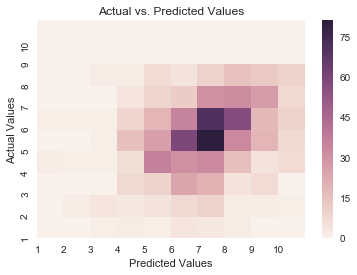

In [78]:
# How well did we do?
rmse, perc_rated, actual_v_pred, preds, acts = validation_comparison(val_df)
print(rmse, perc_rated)
sns.heatmap(actual_v_pred);
plt.xticks(np.arange(10), np.arange(1,11));
plt.yticks(np.arange(10), np.arange(1,11));
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");
plt.title("Actual vs. Predicted Values");

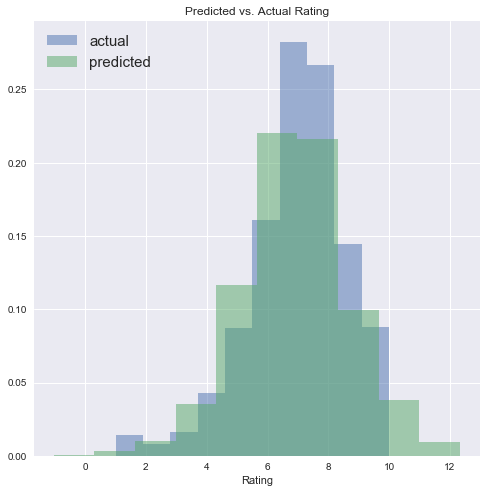

In [80]:
plt.figure(figsize=(8,8))
plt.hist(acts, normed=True, alpha=.5, label='actual');
plt.hist(preds, normed=True, alpha=.5, label='predicted');
plt.legend(loc=2, prop={'size': 15});
plt.xlabel('Rating');
plt.title('Predicted vs. Actual Rating');

`2.` We didn't do so bad on making those predictions!  But, how many user-movie pairs were we unable to make predictions for?  Use the cell below to answer this question.

In [84]:
# From the above, this can be calculated as follows:
print("Number not rated {}".format(int(len(val_df['rating'])*(1-perc_rated))))
print("Number rated {}.".format(int(len(val_df['rating'])*perc_rated)))

Number not rated 1041
Number rated 959.


### Content Based For New Movies

If all of the above went well, you will notice we still have work to do!  We need to bring in a few things we picked up from the last lesson to use for those new users and movies.  Below is the code used to make the content based recommendations, which found movies that were similar to one another.  This was from **5_Content_Based_Recommendations** in the previous lesson.

The below function **find_similar_movies** will provide similar movies to any movie based only on content.  

Run the cell below to gain access to the content based similarity functions.

In [85]:
# Subset so movie_content is only using the dummy variables for each genre and the 3 century based year dummy columns
movie_content = np.array(movies.iloc[:,4:])

# Take the dot product to obtain a movie x movie matrix of similarities
dot_prod_movies = movie_content.dot(np.transpose(movie_content))


def find_similar_movies(movie_id):
    '''
    INPUT
    movie_id - a movie_id 
    OUTPUT
    similar_movies - an array of the most similar movies by title
    '''
    # find the row of each movie id
    movie_idx = np.where(movies['movie_id'] == movie_id)[0][0]
    
    # find the most similar movie indices - to start I said they need to be the same for all content
    similar_idxs = np.where(dot_prod_movies[movie_idx] == np.max(dot_prod_movies[movie_idx]))[0]
    
    # pull the movie titles based on the indices
    similar_movies = np.array(movies.iloc[similar_idxs, ]['movie'])
    
    return similar_movies
    
    
def get_movie_names(movie_ids):
    '''
    INPUT
    movie_ids - a list of movie_ids
    OUTPUT
    movies - a list of movie names associated with the movie_ids
    
    '''
    movie_lst = list(movies[movies['movie_id'].isin(movie_ids)]['movie'])
   
    return movie_lst

### Rank Based For New Users

From the above two code cells, we have a way to make recommendations for movie-user pairs that have ratings in any part of our user-movie matrix.  We also have a way to make ratings for movies that have never received a rating using movie similarities.

In this last part here, we need a way to make recommendations to new users.  For this, our functions from **2_Most_Popular_Recommendations** in Lesson 1 will come in handy.  Run the cell below to have these functions available.

Run the cell below to gain access to the rank based functions.

In [86]:
def create_ranked_df(movies, reviews):
        '''
        INPUT
        movies - the movies dataframe
        reviews - the reviews dataframe
        
        OUTPUT
        ranked_movies - a dataframe with movies that are sorted by highest avg rating, more reviews, 
                        then time, and must have more than 4 ratings
        '''
        
        # Pull the average ratings and number of ratings for each movie
        movie_ratings = reviews.groupby('movie_id')['rating']
        avg_ratings = movie_ratings.mean()
        num_ratings = movie_ratings.count()
        last_rating = pd.DataFrame(reviews.groupby('movie_id').max()['date'])
        last_rating.columns = ['last_rating']

        # Add Dates
        rating_count_df = pd.DataFrame({'avg_rating': avg_ratings, 'num_ratings': num_ratings})
        rating_count_df = rating_count_df.join(last_rating)

        # merge with the movies dataset
        movie_recs = movies.set_index('movie_id').join(rating_count_df)

        # sort by top avg rating and number of ratings
        ranked_movies = movie_recs.sort_values(['avg_rating', 'num_ratings', 'last_rating'], ascending=False)

        # for edge cases - subset the movie list to those with only 5 or more reviews
        ranked_movies = ranked_movies[ranked_movies['num_ratings'] > 4]
        
        return ranked_movies
    

def popular_recommendations(user_id, n_top, ranked_movies):
    '''
    INPUT:
    user_id - the user_id (str) of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back
    ranked_movies - a pandas dataframe of the already ranked movies based on avg rating, count, and time

    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order best to worst
    '''

    top_movies = list(ranked_movies['movie'][:n_top])

    return top_movies
        

### Now For Your Task

The above cells set up everything we need to use to make predictions.  Your task is to write a function, which uses the above information as necessary to provide recommendations for every user in the **val_df** dataframe.  There isn't one right way to do this, but using a blend between the three could be your best bet.  

You can see the blended approach I used in the video on the next page, but feel free to be creative with your solution!

`3.` Use the function below along with the document strings to assist with completing the task for this notebook.  

In [146]:
def make_recommendations(_id, _id_type='movie', train_data=train_data_df, 
                         train_df=train_df, movies=movies, rec_num=5, user_mat=user_mat):
    '''
    INPUT:
    _id - either a user or movie id (int)
    _id_type - "movie" or "user" (str)
    train_data - dataframe of data as user-movie matrix
    train_df - dataframe of training data reviews
    movies - movies df
    rec_num - number of recommendations to return (int)
    user_mat - the U matrix of matrix factorization
    movie_mat - the V matrix of matrix factorization
    
    OUTPUT:
    recs - (array) a list or numpy array of recommended movies like the 
                   given movie, or recs for a user_id given
    '''
    # if the user is available from the matrix factorization data, 
    # I will use this and rank movies based on the predicted values
    # For use with user indexing
    val_users = train_data_df.index
    rec_ids = create_ranked_df(movies, train_df)
    
    if _id_type == 'user':
        if _id in train_data.index:
            # Get the index of which row the user is in for use in U matrix
            idx = np.where(val_users == _id)[0][0]
            
            # take the dot product of that row and the V matrix
            preds = np.dot(user_mat[idx,:],movie_mat)
            
            # pull the top movies according to the prediction
            indices = preds.argsort()[-rec_num:][::-1] #indices
            rec_ids = train_data_df.columns[indices]
            rec_names = get_movie_names(rec_ids)
            
        else:
            # if we don't have this user, give just top ratings back
            rec_names = popular_recommendations(_id, rec_num, ranked_movies)
            
    # Find similar movies if it is a movie that is passed
    else:
        rec_ids = find_similar_movies(_id)
        rec_names = get_movie_names(rec_ids)
    
    return rec_ids, rec_names

In [147]:
make_recommendations(48, 'user')

(Int64Index([92965, 838283, 1659337, 1205489, 421715], dtype='int64', name='movie_id'),
 ['Empire of the Sun (1987)',
  'The Curious Case of Benjamin Button (2008)',
  'Step Brothers (2008)',
  'Gran Torino (2008)',
  'The Perks of Being a Wallflower (2012)'])

In [148]:
len(set(val_df['user_id']))

1241

In [149]:
# Make recommendations
user_recs_dict_with_top = dict()
for user_id in set(val_df['user_id']):
    user_recs_dict_with_top[user_id] = make_recommendations(user_id, 'user')[1]

In [150]:
cnter = 0
for user, rec in user_recs_dict_with_top.items():
    if cnter < 12:
        print("For user {}, our recommendations are: \n {}".format(user, rec))
        cnter+=1
    else:
        break

For user 51201, our recommendations are: 
 ['The Dark Knight (2008)', 'Argo (2012)', 'Looper (2012)', 'Stoker (2013)', 'The Sessions (2012)']
For user 53249, our recommendations are: 
 ['Empire of the Sun (1987)', 'The Curious Case of Benjamin Button (2008)', 'Step Brothers (2008)', 'Incendies (2010)', 'Shame (2011)']
For user 20486, our recommendations are: 
 ['Blood Diamond (2006)', 'There Will Be Blood (2007)', 'Silver Linings Playbook (2012)', 'Cloud Atlas (2012)', 'Searching for Sugar Man (2012)']
For user 4103, our recommendations are: 
 ['Empire of the Sun (1987)', 'Casino (1995)', 'De reis van Chihiro (2001)', 'Argo (2012)', 'Les Misérables (2012)']
For user 34824, our recommendations are: 
 ['Fight Club (1999)', 'Life of Pi (2012)', 'Incendies (2010)', 'Gangster Squad (2013)', 'Ruby Sparks (2012)']
For user 32774, our recommendations are: 
 ['Taegukgi hwinalrimyeo (2004)', 'Lincoln (2012)', 'Blood Diamond (2006)', 'The Fall (2006)', "De rouille et d'os (2012)"]
For user 16395,

**This recommendation style looks like it may do okay with accuracy, but it seems like a lot of the same movies are showing up.  When we think back to serendipity, novelty, and diversity as means of a good recommendation system, this set of recommendations still isn't great.  We might consider providing some content based recommendations from movies an individual has watched along with these recommendations to meet those categories of a good recommender.**

# 22 The Cold Start Problem Solution

# 23 Putting It All Together

Recommendations Class Should:
- Have a fit method
- Predict the rating for a given user-movie
- Give a list of recommendations for a given user

# 24 Code Walkthrough

# 25 Workspace: Recommender Module

# 26 Conclusion

# 27 Review

In this lesson, you got your hands on some of the most important ideas associated with recommendation systems:

### Recommender Validation
You looked at methods for validating your recommendations (when possible) using offline methods. In these cases, you could split your data into training and testing data. Frequently this split is based on time, where events earlier in time are in the training data, and events later in time are in a testing dataset.

We also quickly introduced the idea of being able to see how well your recommendation engine works by simply throwing it out into the world to directly see the impact.

### Matrix Factorization with SVD
Next, we looked at matrix factorization as a technique for making recommendations. Traditional singular value decomposition a technique can be used when your matrices have no missing values. In this decomposition technique, a user-item (A) can be decomposed as follows:

$A = U\Sigma V^T$
 

Where
- $U $gives information about how users are related to latent features.
- $\Sigma$ gives information about how much latent features matter towards recreating the user-item matrix.
- $V^T$ gives information about how much each movie is related to latent features.

Since this traditional decomposition doesn't actually work when our matrices have missing values, we looked at another method for decomposing matrices.

### FunkSVD
FunkSVD was a new method that you found to be useful for matrices with missing values. With this matrix factorization you decomposed a user-item (A) as follows:

$A = UV^T$
 

Where
- $U$ gives information about how users are related to latent features.
- $V^T$ gives information about how much each movie is related to latent features.

You found that you could iterate to find the latent features in each of these matrices using gradient descent. You wrote a function to implement gradient descent to find the values within these two matrices.

Using this method, you were able to make a prediction for any user-movie pair in your dataset. You also could use it to test how well your predictions worked on a train-test split of the data. However, this method fell short with new users or movies.

### The Cold Start Problem
Collaborative filtering using FunkSVD still wasn't helpful for new users and new movies. In order to recommend these items, you implemented content based and ranked based recommendations along with your FunkSVD implementation.

### Author's Note
There are so many ways to make recommendations, and this course provides you a very strong mind and skill set to tackle building your own recommendation systems in practice.